# Customer Segmentation and Recommendation System Project

## Introduction

In this project, we aim to enhance marketing strategies and increase sales for an online retail business by analyzing transactional data from a UK-based retailer. The dataset, which spans from 2010 to 2011, contains detailed information about customer purchases, including transaction dates, product descriptions, quantities, and prices.

### Project Objectives

1. **Customer Segmentation**: To group customers into distinct segments based on their purchasing behavior using the K-means clustering algorithm. This segmentation will allow the business to tailor marketing strategies to different customer groups effectively.

2. **Recommendation System**: To develop a recommendation system that suggests top-selling products to customers within each segment who have not yet purchased those items. This will help boost sales and enhance customer satisfaction by providing personalized product recommendations.

### Step 1: Data Understanding and Exploration

In the first step of this project, we will explore the dataset to understand its structure, identify any data quality issues, and gain insights into the key features that will be used for customer segmentation and recommendation. The main tasks in this step include:

- Loading the dataset into a pandas DataFrame.
- Performing an initial inspection to understand the structure and content of the data.
- Checking for missing values and data types to ensure data quality.
- Generating basic statistics to understand the distribution and characteristics of numerical and categorical features.

By thoroughly understanding the dataset, we will lay the foundation for effective data preprocessing, feature engineering, and model development in the subsequent steps of the project.

In [160]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [161]:
# Load the dataset
file_path = 'data/retail-data.csv'
df = pd.read_csv(file_path)

In [162]:
# Display the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [163]:
# Get the shape of the dataset to understand the number of rows and columns
print("\nDataset shape (rows, columns):", df.shape)


Dataset shape (rows, columns): (541909, 8)


In [164]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [165]:
# Check the data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [166]:
# Get basic statistics of numeric columns
print("\nSummary statistics of numeric columns:")
display(df.describe())


Summary statistics of numeric columns:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [167]:
# Get basic statistics of categorical columns
print("\nSummary statistics of categorical columns:")
display(df.describe(include=['object']))


Summary statistics of categorical columns:


,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


### Step 2: Data Cleaning and Preprocessing

In this step, we will clean and preprocess the dataset based on the insights obtained during the data exploration phase. The main tasks include:

- **Handling missing values**: We will drop rows where `CustomerID` is missing, as these are critical for customer segmentation.
- **Removing duplicates**: We'll remove any duplicate transactions to ensure the integrity of the dataset.
- **Filtering out anomalies**: We'll remove rows with negative or zero `Quantity` and `UnitPrice`, as these values represent either returns, errors, or irrelevant data.
- **Converting data types**: We'll convert `InvoiceDate` to a datetime format, which is necessary for extracting time-based features later.
- **Removing unnecessary columns**: We'll remove the `Description` column since it's not useful for analysis or modeling.
- **Creating new features**: We'll create a `TotalPrice` feature, which will help in understanding customer monetary value for segmentation.

This preprocessing will prepare the dataset for customer segmentation and recommendation system modeling.

In [168]:
# 1. Remove the 'Description' column as it's not needed
df_cleaned = df.drop(columns=['Description'])

# 2. Handling missing values
# Remove rows where the CustomerID is missing (essential for customer-level analysis)
df_cleaned = df_cleaned.dropna(subset=['CustomerID'])

# 3. Removing duplicates
# Remove any duplicate rows to ensure unique transactions
df_cleaned = df_cleaned.drop_duplicates()

# 4. Filtering out anomalies
# Remove rows with negative or zero Quantity and UnitPrice (indicating returns or errors)
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

# 5. Converting data types
# Convert InvoiceDate to datetime format for time-based analysis
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# 6. Creating new features
# Create a 'TotalPrice' feature = Quantity * UnitPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [169]:
# Display the cleaned dataset and summary of changes
print("Cleaned dataset shape (rows, columns):", df_cleaned.shape)
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())

Cleaned dataset shape (rows, columns): (392690, 8)

Missing values after cleaning:
InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


In [170]:
# Display the first few rows of the cleaned dataset
print("\nFirst 5 rows of the cleaned dataset:")
display(df_cleaned.head())


First 5 rows of the cleaned dataset:


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Step 3: Customer Segmentation Using K-Means Clustering

In this step, we will group customers into distinct segments based on their purchasing behavior using the K-means clustering algorithm. We will first create RFM (Recency, Frequency, Monetary) features that summarize customer behavior, normalize these features, and then use K-means clustering to create customer segments.

The main tasks in this step include:

1. **Creating RFM features**:
   - Recency: Days since the customer's last purchase.
   - Frequency: Total number of transactions made by the customer.
   - Monetary Value: Total money spent by the customer.
   
2. **Normalizing the RFM features**: We will standardize the RFM features to ensure they are on the same scale for K-means clustering.

3. **Determining the optimal number of clusters**: We'll use the Elbow method to find the best number of clusters for the K-means algorithm.

4. **Running the K-means algorithm**: We will apply the K-means algorithm to segment customers into groups.

By the end of this step, we will have customer segments that can be used to understand customer behavior and preferences.

In [171]:
# 1. Creating the RFM (Recency, Frequency, Monetary) features

# Recency: Days since the last purchase (max date - last purchase date for each customer)
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
max_date = df_cleaned['InvoiceDate'].max()
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalPrice': 'sum'    # Monetary
}).reset_index()

# Rename columns for better understanding
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# 2. Normalizing the RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

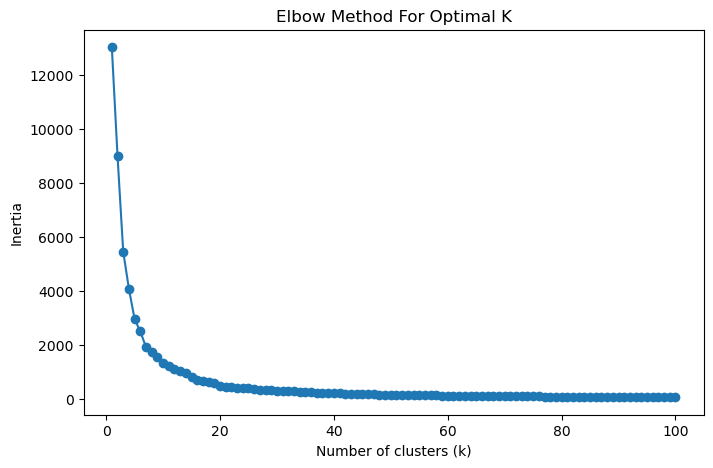

In [172]:
# 3. Determining the optimal number of clusters using the Elbow method
inertia = []  # Sum of squared distances to the nearest cluster center for different numbers of clusters
k_values = range(1, 101)  # We will test for 1 to 10 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method result
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [173]:
# 4. Running the K-Means algorithm with the optimal number of clusters
# Based on the elbow plot, choose the number of clusters (e.g., k=4)
optimal_k = 4  # Assume from the plot, we will determine this later
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [174]:
# 5. Analyze the resulting customer segments
# Display the RFM data along with cluster assignments
print("RFM with cluster assignments:")
display(rfm.head())

RFM with cluster assignments:


,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,1,77183.60,1
1,12347.0,1,182,4310.00,0
2,12348.0,74,31,1797.24,0
3,12349.0,18,73,1757.55,0
4,12350.0,309,17,334.40,2


In [175]:
# Display the average RFM values for each customer segment
print("\nAverage RFM values for each customer segment:")
display(rfm.groupby('Cluster').mean())


Average RFM values for each customer segment:


,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,15284.522825,40.443245,101.010487,1943.185794
1,15155.500000,30.000000,915.857143,121183.096429
2,15351.552876,246.330241,27.386827,563.855622
3,14899.000000,1.000000,5717.250000,70612.247500


In [176]:
# Step 1: Scale the data (DBSCAN is also sensitive to scales)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

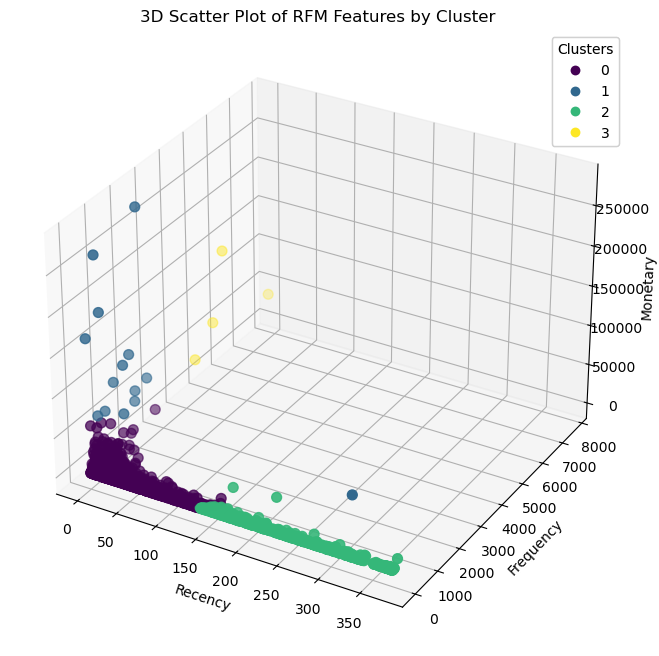

In [177]:
# 1. 3D Scatter Plot of RFM Features Colored by Cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of RFM features
scatter = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], 
                     c=rfm['Cluster'], cmap='viridis', s=50)

# Labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot of RFM Features by Cluster')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

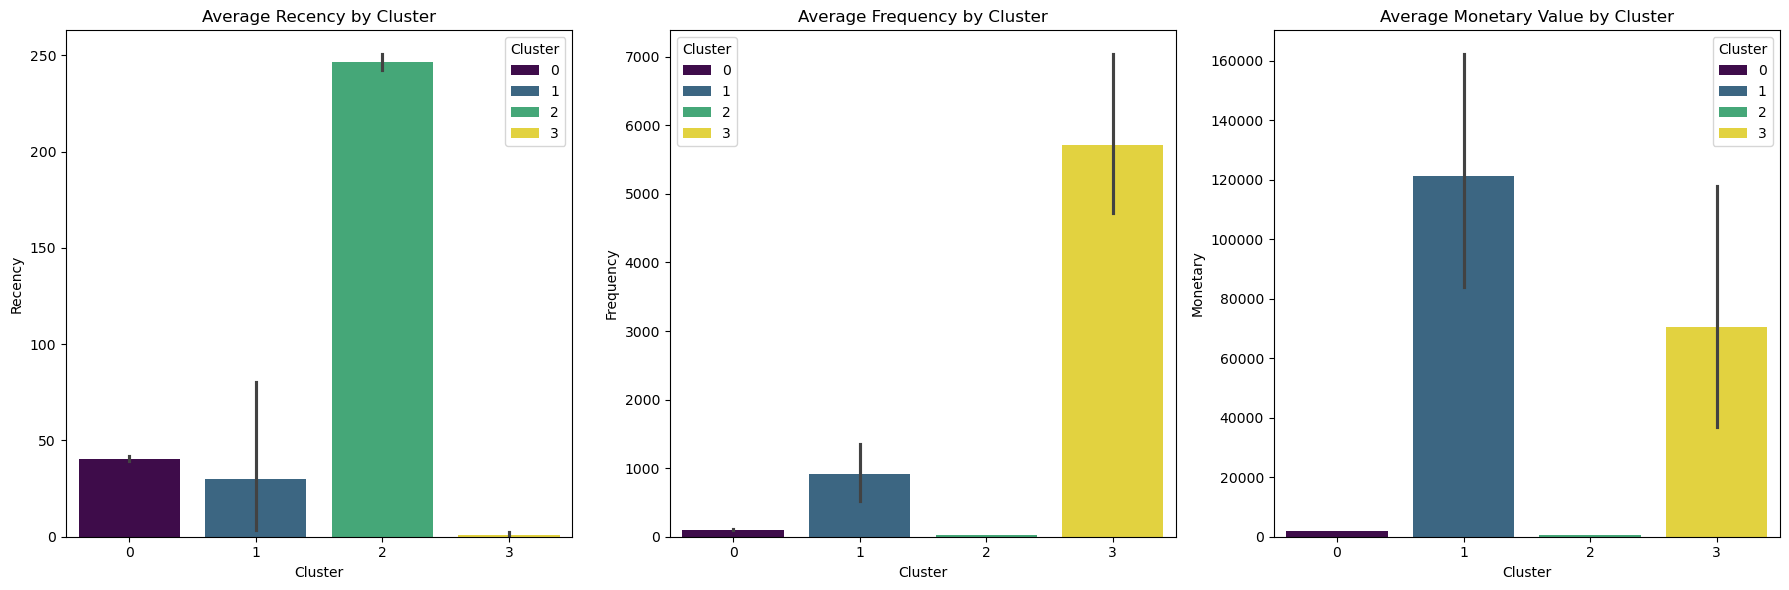

In [178]:
# 2. Bar Plots of Average RFM Values by Cluster

# Set up the plot grid
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for Recency
sns.barplot(x='Cluster', y='Recency', data=rfm, ax=axes[0], palette='viridis', hue="Cluster")
axes[0].set_title('Average Recency by Cluster')

# Bar plot for Frequency
sns.barplot(x='Cluster', y='Frequency', data=rfm, ax=axes[1], palette='viridis', hue="Cluster")
axes[1].set_title('Average Frequency by Cluster')

# Bar plot for Monetary
sns.barplot(x='Cluster', y='Monetary', data=rfm, ax=axes[2], palette='viridis', hue="Cluster")
axes[2].set_title('Average Monetary Value by Cluster')

# Display the plots
plt.tight_layout()
plt.show()

Cluster labels assigned by DBSCAN:
Cluster
 0    4285
-1      46
 1       7
Name: count, dtype: int64


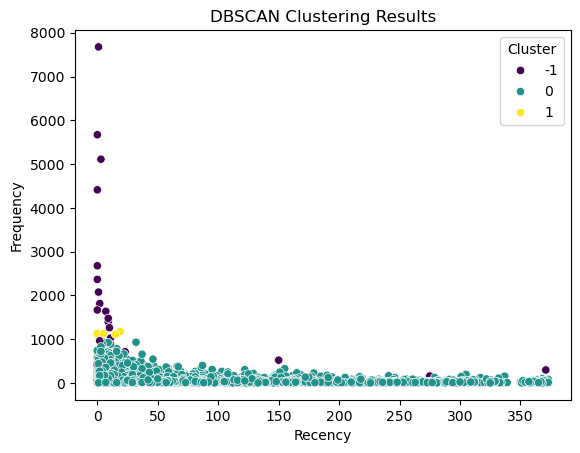

In [179]:
# Step 1: Scale the data (DBSCAN is also sensitive to scales)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Step 2: Apply DBSCAN
# Parameters: eps (distance threshold), min_samples (minimum points to form a cluster)
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You may need to tune these values
rfm['Cluster'] = dbscan.fit_predict(rfm_scaled)

# Step 3: Check the results
print("Cluster labels assigned by DBSCAN:")
print(rfm['Cluster'].value_counts())  # -1 is the label for noise

# Step 4: Visualize the clusters (optional)
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.show()

In [180]:
# Increase both eps and min_samples
for eps_value in [0.7, 0.9, 1.0]:
    for min_samples_value in [5, 10, 15]:
        dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
        rfm['Cluster'] = dbscan.fit_predict(rfm_scaled)
        print(f"eps={eps_value}, min_samples={min_samples_value}")
        print(rfm['Cluster'].value_counts())

eps=0.7, min_samples=5
Cluster
 0    4304
-1      34
Name: count, dtype: int64
eps=0.7, min_samples=10
Cluster
 0    4292
-1      46
Name: count, dtype: int64
eps=0.7, min_samples=15
Cluster
 0    4283
-1      55
Name: count, dtype: int64
eps=0.9, min_samples=5
Cluster
 0    4309
-1      29
Name: count, dtype: int64
eps=0.9, min_samples=10
Cluster
 0    4307
-1      31
Name: count, dtype: int64
eps=0.9, min_samples=15
Cluster
 0    4294
-1      44
Name: count, dtype: int64
eps=1.0, min_samples=5
Cluster
 0    4309
-1      29
Name: count, dtype: int64
eps=1.0, min_samples=10
Cluster
 0    4309
-1      29
Name: count, dtype: int64
eps=1.0, min_samples=15
Cluster
 0    4299
-1      39
Name: count, dtype: int64


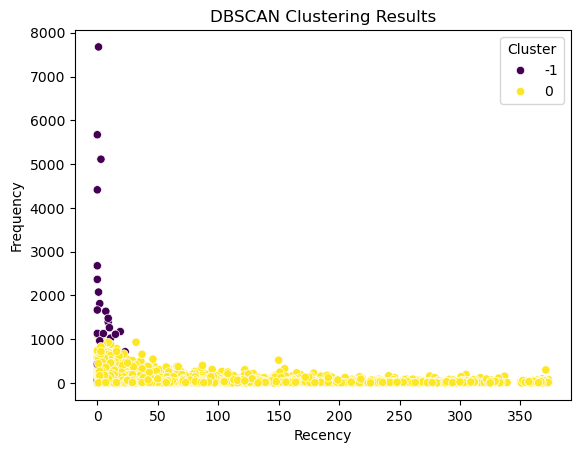

In [181]:
# Step 4: Visualize the clusters (optional)
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.show()

In [186]:
rfm("Recency").describe()

TypeError: 'DataFrame' object is not callable